# 正規乱数を受理・棄却法で生成
- 提案分布としてラプラス分布(二重指数分布)を使用

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import norm, laplace, uniform

In [11]:
np.random.seed()

## 目標分布f

In [12]:
f = norm(loc=0.0, scale=1.0).pdf

## 提案分布g
- scale = 1/alphaになる
- alpha=1が効率が良い

In [13]:
gv = laplace(loc=0.0, scale=1.0)
g = gv.pdf

### 分布の上限を指定する定数Mを設定

In [14]:
alpha = 1.0
M = np.sqrt(2.0 / np.pi) * (1.0/alpha) * np.exp(alpha**2/2.0)
print("M={}".format(M))

M=1.315489246958914


In [15]:
Nsim = 100000

### 提案分布gからの乱数Yを生成

In [16]:
Y = gv.rvs(size=Nsim)

In [17]:
U = uniform.rvs(size=Nsim)

### Yから受理の条件を満たすサンプルXを残して残りを棄却

In [18]:
X = Y[U <= f(Y)/(M*g(Y))]
print("サンプル数: {} => {}".format(len(Y), len(X)))
print('実際の受理率: {}'.format(len(X)/float(len(Y))))
print('理論的な受理率: {}'.format(1.0/M))

サンプル数: 100000 => 76382
実際の受理率: 0.76382
理論的な受理率: 0.7601734505331403


## 目標分布を描画

In [19]:
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

In [20]:
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

In [21]:
plt.hist(X, bins=50, normed=True)

(array([  2.37242987e-04,   2.37242987e-04,   5.53566971e-04,
          1.18621494e-03,   2.53059187e-03,   4.03313079e-03,
          6.80096564e-03,   1.03596105e-02,   1.49463082e-02,
          2.26171648e-02,   3.52701241e-02,   4.95837844e-02,
          7.11728962e-02,   9.26038461e-02,   1.17751603e-01,
          1.59269126e-01,   1.85603097e-01,   2.30362941e-01,
          2.75676351e-01,   3.04619996e-01,   3.50724216e-01,
          3.70652627e-01,   3.81486724e-01,   3.94772331e-01,
          3.91134605e-01,   3.88366770e-01,   3.63456257e-01,
          3.29214186e-01,   2.95367519e-01,   2.64367769e-01,
          2.14863066e-01,   1.83863315e-01,   1.41554983e-01,
          1.10238908e-01,   8.13743447e-02,   6.13668528e-02,
          4.59460586e-02,   2.96553734e-02,   2.08773829e-02,
          1.49463082e-02,   8.06626157e-03,   5.53566971e-03,
          2.84691585e-03,   2.13518689e-03,   1.02805295e-03,
          6.32647967e-04,   1.58161992e-04,   1.58161992e-04,
        

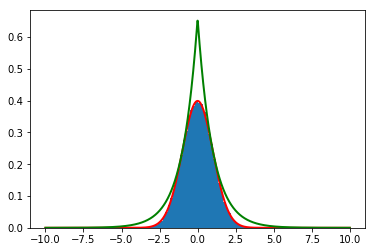

In [22]:
plt.show()